In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 700)

In [2]:
g_data = pd.read_pickle('./data_max_3months')
print(len(g_data))
display(g_data.head())

176


,TDS,PMI_days,log_PMI_days,age_at_death,sex_male,est_weight_lb,est_stature_in,true_SOD_G_head,true_SOD_G_torso,true_SOD_G_limbs,fall,spring,summer,log_ADD_thres0,ADD_thres0,ADD_thres5,ADD_thres10,ADD_thres15,ADD_thres20,ADD_thres25,ADD_thres30,temp_1_3_mean,temp_1_3_std,hum_1_3_mean,hum_1_3_std,temp_4_7_mean,temp_4_7_std,hum_4_7_mean,hum_4_7_std,temp_8_21_mean,temp_8_21_std,hum_8_21_mean,hum_8_21_std,temp_22_56_mean,temp_22_56_std,hum_22_56_mean,hum_22_56_std,temp_57_154_mean,temp_57_154_std,hum_57_154_mean,hum_57_154_std,temp_155_365_mean,temp_155_365_std,hum_155_365_mean,hum_155_365_std,BMI,BMI_status
0,9.0,15.0,2.772589,77.0,0,180.0,64.000000,3.0,3.0,3.0,0,0,0,4.315902,73.881146,65.115868,32.350972,0.000000,0.000000,0.0,0.0,9.315,0.888,71.621,12.679,-3.108,7.418,62.885,6.736,-0.699,6.638,74.493,16.490,4.205,5.889,78.049,14.677,16.426,6.113,76.979,10.014,18.181,7.197,67.221,13.361,30.9,obese
1,13.0,79.0,4.382027,38.0,1,516.0,73.000039,5.0,5.0,3.0,0,1,0,7.190920,1326.323441,1326.323441,1279.608857,983.358857,391.756402,0.0,0.0,19.485,0.935,57.198,2.203,18.725,0.697,76.769,8.882,17.617,4.230,64.476,8.287,16.590,4.368,58.561,15.086,7.484,7.232,69.266,15.024,19.483,6.770,74.838,10.009,68.1,obese
3,13.0,50.0,3.931826,73.0,1,235.0,73.000039,5.0,4.0,4.0,0,0,0,5.764677,317.835928,268.610789,126.581344,30.420863,0.000000,0.0,0.0,3.511,1.705,89.241,11.812,2.666,2.899,57.956,9.740,10.313,2.750,84.482,10.465,5.370,3.923,79.734,12.914,18.516,7.254,81.323,8.885,16.984,8.703,73.738,13.603,31.0,obese
4,6.0,11.0,2.484907,90.0,0,170.0,69.000037,2.0,2.0,2.0,0,0,0,4.258335,69.692188,54.013368,39.090451,15.414583,0.000000,0.0,0.0,3.825,1.623,80.427,17.534,3.942,4.081,64.240,4.184,6.799,5.078,79.896,12.073,10.311,4.085,80.913,11.039,24.042,2.560,80.822,7.902,12.899,9.807,73.032,14.609,25.1,overweight
5,9.0,66.0,4.204693,64.0,0,157.0,60.000000,3.0,3.0,3.0,0,1,0,6.489965,657.500496,616.025357,461.613472,254.476389,41.970833,0.0,0.0,15.961,3.236,66.252,5.476,14.144,3.640,69.846,12.858,10.503,4.683,70.781,15.763,10.276,5.622,75.338,16.508,4.996,6.579,76.685,14.145,21.018,4.598,72.179,11.084,30.7,obese


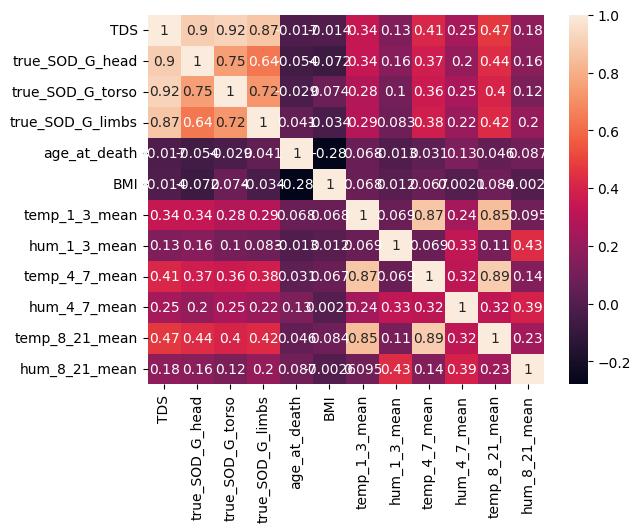

In [3]:
corr_matrix = g_data[['TDS', 'true_SOD_G_head', 'true_SOD_G_torso', 'true_SOD_G_limbs','age_at_death', 'BMI', 
                      'temp_1_3_mean', 'hum_1_3_mean', 'temp_4_7_mean',
           'hum_4_7_mean', 'temp_8_21_mean', 'hum_8_21_mean']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [4]:
# create y dataframes
y_pmi = g_data['log_PMI_days'].copy()
display(y_pmi.head(2))
print(y_pmi.shape)

y_add = g_data['log_ADD_thres0'].copy()
display(y_add.head(2))
print(y_add.shape)

0    2.772589
1    4.382027
Name: log_PMI_days, dtype: float64

(176,)


0    4.315902
1    7.190920
Name: log_ADD_thres0, dtype: float64

(176,)


In [5]:
def standardize_X(X, col_names_ls):
    # standardize numeric features
    X_stand = X.copy()

    # apply standardization
    for i in col_names_ls:
    
        # fit on training data column
        scale = StandardScaler().fit(X_stand[[i]])
    
        # transform the training data column
        X_stand[i] = scale.transform(X_stand[[i]])
        
    return X_stand

In [6]:
def fit_model(X, y):
    X = sm.add_constant(X) 
    est = sm.OLS(y, X).fit() 
    print(est.summary())
    
    y_pred = est.predict(X)
    rmse = mean_squared_error(y, y_pred, squared = False)
    print('RMSE:', rmse)
    
    y_pred_unlogged = np.exp(y_pred).copy()
    y_unlogged = np.exp(y-1).copy()
    rmse_unlogged = mean_squared_error(y_unlogged, y_pred_unlogged, squared = False)
    print('RMSE (unlogged):', rmse_unlogged)
    
    fig = plt.figure(figsize=(5, 3)) 
    residuals = y - y_pred
    #plt.scatter(y_pmi.log_PMI_days, residuals)
    plt.hist(residuals)
    #fig = sm.graphics.plot_regress_exog(est, 'TDS', fig=fig) 
    plt.show()

## TDS

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     47.49
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           9.74e-11
Time:                        13:37:54   Log-Likelihood:                -206.22
No. Observations:                 176   AIC:                             416.4
Df Residuals:                     174   BIC:                             422.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7552      0.220      7.985      0.0

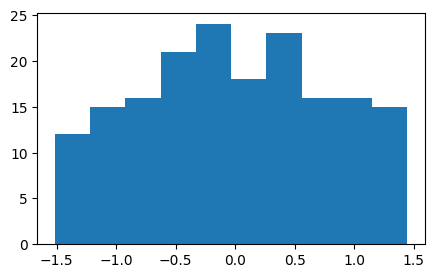

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.47e-25
Time:                        13:37:54   Log-Likelihood:                -193.39
No. Observations:                 176   AIC:                             390.8
Df Residuals:                     174   BIC:                             397.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

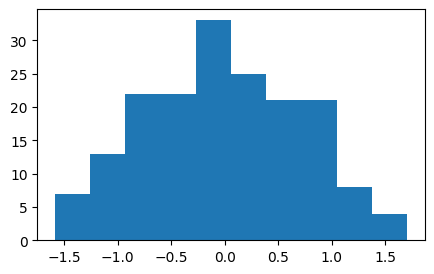

In [7]:
X1 = g_data[['TDS']]

pmi1 = fit_model(X1, y_pmi)
print('############################################################################################')
add1 = fit_model(X1, y_add)

## Weighted SODs

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     17.68
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.75e-10
Time:                        13:40:27   Log-Likelihood:                -203.80
No. Observations:                 176   AIC:                             415.6
Df Residuals:                     172   BIC:                             428.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7706      0.219  

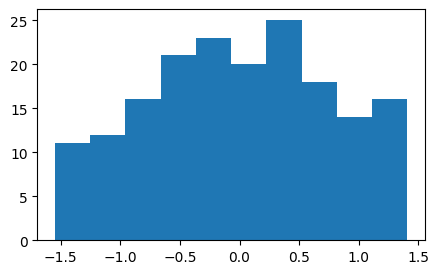

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     50.21
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.32e-23
Time:                        13:40:28   Log-Likelihood:                -192.90
No. Observations:                 176   AIC:                             393.8
Df Residuals:                     172   BIC:                             406.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

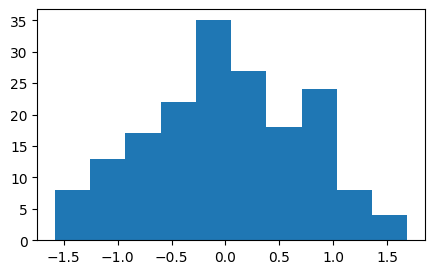

In [8]:
X2 = g_data[['true_SOD_G_head', 'true_SOD_G_torso', 'true_SOD_G_limbs']]

pmi2 = fit_model(X2, y_pmi)
print('############################################################################################')
add2 = fit_model(X2, y_add)

## TDS + demographics (BMI, age, sex)

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     14.94
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.72e-10
Time:                        13:40:57   Log-Likelihood:                -201.08
No. Observations:                 176   AIC:                             412.2
Df Residuals:                     171   BIC:                             428.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.3424      0.081     41.136   

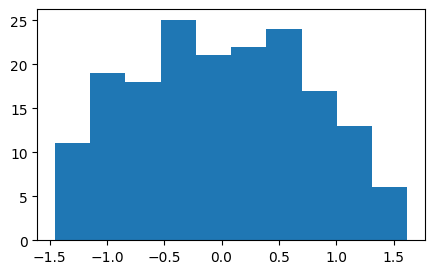

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     41.13
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.03e-24
Time:                        13:40:57   Log-Likelihood:                -188.94
No. Observations:                 176   AIC:                             387.9
Df Residuals:                     171   BIC:                             403.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

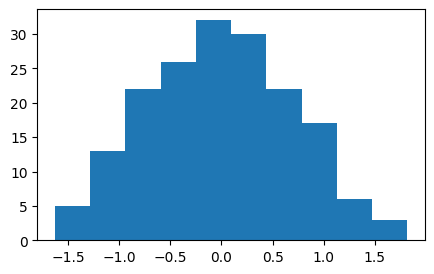

In [9]:
X3 = g_data[['TDS', 'BMI', 'age_at_death', 'sex_male']]
X3_stand = standardize_X(X3, ['TDS', 'BMI', 'age_at_death'])
#display(X3_stand.describe())

pmi3 = fit_model(X3_stand, y_pmi)
print('############################################################################################')
add3 = fit_model(X3_stand, y_add)

## TDS + demographics (BMI, age, sex) + weather related

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     11.42
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           3.27e-17
Time:                        13:41:59   Log-Likelihood:                -170.20
No. Observations:                 176   AIC:                             368.4
Df Residuals:                     162   BIC:                             412.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7761      0.181     20.

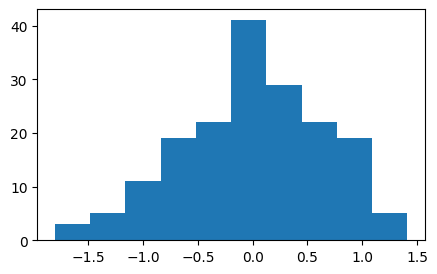

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     22.87
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           2.80e-30
Time:                        13:41:59   Log-Likelihood:                -156.54
No. Observations:                 176   AIC:                             341.1
Df Residuals:                     162   BIC:                             385.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

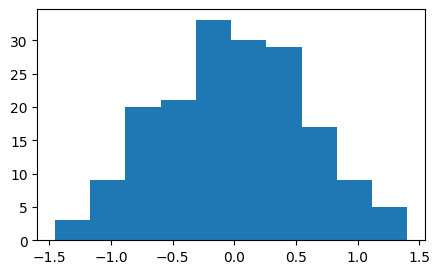

In [10]:
X4 = g_data[['TDS', 'BMI', 'age_at_death', 'sex_male',
            'fall', 'spring', 'summer', 'temp_1_3_mean', 'hum_1_3_mean', 'temp_4_7_mean',
           'hum_4_7_mean', 'temp_8_21_mean', 'hum_8_21_mean']]
X4_stand = standardize_X(X4, ['TDS', 'BMI', 'age_at_death', 'temp_1_3_mean', 'hum_1_3_mean', 'temp_4_7_mean',
           'hum_4_7_mean', 'temp_8_21_mean', 'hum_8_21_mean'])
#display(X4_stand.describe())

pmi4 = fit_model(X4_stand, y_pmi)
print('############################################################################################')
add4 = fit_model(X4_stand, y_add)

## TDS + weather related

                            OLS Regression Results                            
Dep. Variable:           log_PMI_days   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     36.18
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           7.09e-19
Time:                        13:22:17   Log-Likelihood:                -261.38
No. Observations:                 213   AIC:                             530.8
Df Residuals:                     209   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.4995      0.057     61.

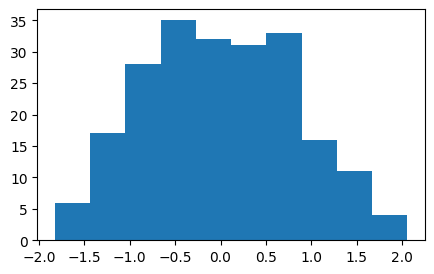

############################################################################################
                            OLS Regression Results                            
Dep. Variable:         log_ADD_thres0   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     87.60
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           9.65e-37
Time:                        13:22:17   Log-Likelihood:                -235.31
No. Observations:                 213   AIC:                             478.6
Df Residuals:                     209   BIC:                             492.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

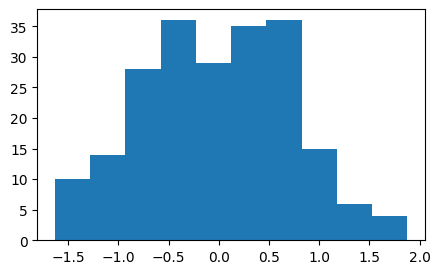

In [130]:
X5 = g_data[['TDS','temp_8_21_mean', 'hum_8_21_mean']]
X5_stand = standardize_X(X5, ['TDS','temp_8_21_mean', 'hum_8_21_mean'])
#display(X4_stand.describe())

pmi5 = fit_model(X5_stand, y_pmi)
print('############################################################################################')
add5 = fit_model(X5_stand, y_add)